In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
bankchurner = pd.read_csv('BankChurner_NotClean.csv')
bankchurner.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [3]:
creditlimit = pd.read_csv('CreditLimit.csv')
creditlimit.columns

Index(['CLIENTNUM', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

# 1. Joining Bank Churner data with Credit Limit data.

Join both data based on CLIENTNUM column.

In [4]:
df0 = pd.merge(bankchurner, creditlimit, on='CLIENTNUM', how='inner')
df0

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit_y,Total_Revolving_Bal_y,Avg_Open_To_Buy_y,Total_Amt_Chng_Q4_Q1_y,Total_Trans_Amt_y,Total_Trans_Ct_y,Total_Ct_Chng_Q4_Q1_y,Avg_Utilization_Ratio_y,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1_y,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2_y
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,768805383,Existing Customer,30.0,F,3,High School,Married,60𝐾− 80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
2,768805383,Existing Customer,45.0,M,3,High School,Single,60𝐾− 80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
3,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
4,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,532236358,Existing Customer,NaN,M,3,Uneducated,Married,60𝐾− 80K,Gold,21,...,116.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
10182,442211858,Existing Customer,NaN,M,4,High School,Unknown,Less than $40K,Blue,34,...,333.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
10183,479412258,Existing Customer,NaN,NaN,4,High School,Unknown,Less than $40K,Blue,34,...,333.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
10184,539226333,Existing Customer,NaN,NaN,4,High School,Unknown,Less than $40K,Blue,34,...,333.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987


We suspect that there are duplicated columns, thus we conduct a check on the dataframe.

In [5]:
def duplicated_col(data, id_col1: int, id_col2: int):
    duplicates = data.iloc[:,id_col1].equals(data.iloc[:,id_col2])
    cols = df0.columns
    if duplicates:
        # note = f"The columns {data.columns[id_col1]} and {data.columns[id_col2]} are duplicates."
        ratio = (data.iloc[:,id_col1]==data.iloc[:,id_col2]).sum()/data.shape[0]
        status = "Duplicate"
        return (1,cols[id_col1],cols[id_col2],ratio, status)
    else:
        ratio = (data.iloc[:,id_col1]==data.iloc[:,id_col2]).sum()/data.shape[0]
        if ratio > 0.90:
            # note = f"The columns {data.columns[id_col1]} and {data.columns[id_col2]} are almost duplicates."
            status = "Almost duplicate"
            return (1,cols[id_col1],cols[id_col2],ratio, status)
        else:
            return (0,999,0)
        # print(f"The columns {data.columns[id_col1]} and {data.columns[id_col2]} are not duplicates.")
    

In [6]:
cols = df0.columns
num_cols = len(df0.columns)
comp_table = pd.DataFrame()
for i in range(num_cols-1):
    for j in range(i+1, num_cols):
        duplicates = duplicated_col(df0, i,j)
        if duplicates[0] == 1:
            to_append = pd.DataFrame({
                'Column 1': [duplicates[1]],
                'Column 2': [duplicates[2]],
                'Level of Similarity (%)' : [duplicates[3]*100],
                'Status': [duplicates[4]]
            })
            comp_table = pd.concat([comp_table,to_append], ignore_index=True)
comp_table

,Column 1,Column 2,Level of Similarity (%),Status
0,Credit_Limit_x,Credit_Limit_y,100.000000,Duplicate
1,Total_Revolving_Bal_x,Total_Revolving_Bal_y,100.000000,Duplicate
2,Avg_Open_To_Buy_x,Avg_Open_To_Buy_y,100.000000,Duplicate
3,Total_Amt_Chng_Q4_Q1_x,Total_Amt_Chng_Q4_Q1_y,98.910269,Almost duplicate
4,Total_Trans_Amt_x,Total_Trans_Amt_y,100.000000,Duplicate
5,Total_Trans_Ct_x,Total_Trans_Ct_y,100.000000,Duplicate
6,Total_Ct_Chng_Q4_Q1_x,Total_Ct_Chng_Q4_Q1_y,98.331043,Almost duplicate
7,Avg_Utilization_Ratio_x,Avg_Utilization_Ratio_y,94.747693,Almost duplicate
8,Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...,Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...,99.165521,Almost duplicate
9,Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...,Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...,99.803652,Almost duplicate


Notice that there are only 10 columns that are duplicates (or almost), thus we drop them.

In [7]:
comp_table_cols = comp_table.columns
for i in range (comp_table.shape[0]):
    x = re.sub(r'_[x]$', '', str(comp_table.iloc[i,0]))
    df0.rename(columns={comp_table.iloc[i,0]: x}, inplace=True)
    df0.drop(columns=[comp_table.iloc[i,1]], inplace=True)
df0.drop(columns=[df0.columns[-1],df0.columns[-2]],inplace=True)

In [8]:
df0['CLIENTNUM']=df0['CLIENTNUM'].astype('str')
df0 # Join dataframe of both tables without duplicated columns

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,768805383,Existing Customer,30.0,F,3,High School,Married,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
2,768805383,Existing Customer,45.0,M,3,High School,Single,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
3,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
4,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,532236358,Existing Customer,NaN,M,3,Uneducated,Married,60𝐾− 80K,Gold,21,...,1,0,116.0,0,4716.0,2.175,816,28,2.500,0.000
10182,442211858,Existing Customer,NaN,M,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,333.0,2517,796.0,1.405,1171,20,2.333,0.760
10183,479412258,Existing Customer,NaN,NaN,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,333.0,2517,796.0,1.405,1171,20,2.333,0.760
10184,539226333,Existing Customer,NaN,NaN,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,333.0,2517,796.0,1.405,1171,20,2.333,0.760


In [9]:
df0.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# 2. Data Quick Look

## a. Data's Dimension, Head, Tail, and Summary Statistic 

### Data's Dimension

In [10]:
print(f'''The data has {df0.shape[0]} rows and {df0.shape[1]} columns.''')

The data has 10186 rows and 21 columns.


### Data's Head

In [11]:
# Show the first 5 rows of the data
df0.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,768805383,Existing Customer,30.0,F,3,High School,Married,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
2,768805383,Existing Customer,45.0,M,3,High School,Single,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
3,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
4,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [12]:
# Show the last 5 rows of the data
df0.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10181,532236358,Existing Customer,NaN,M,3,Uneducated,Married,60𝐾− 80K,Gold,21,...,1,0,116.0,0,4716.0,2.175,816,28,2.500,0.00
10182,442211858,Existing Customer,NaN,M,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,333.0,2517,796.0,1.405,1171,20,2.333,0.76
10183,479412258,Existing Customer,NaN,NaN,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,333.0,2517,796.0,1.405,1171,20,2.333,0.76
10184,539226333,Existing Customer,NaN,NaN,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,333.0,2517,796.0,1.405,1171,20,2.333,0.76
10185,522106332,Existing Customer,NaN,NaN,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,333.0,2517,796.0,1.405,1171,20,2.333,0.76


## b. Average of customer's age with income $80K-$120K

In [13]:
avg = df0.loc[df0['Income_Category'] == '$80K - $120K', 'Customer_Age'].mean()
print(f"Average of costumer's age with income $80k-$120k is {round(avg,2)}.")

Average of costumer's age with income $80k-$120k is 46.44.


## c. Number of customer based on gender and education level

In [14]:
customer_grouped = df0.groupby(['Gender', 'Education_Level']).size().reset_index(name='Number of Customer')
customer_grouped

,Gender,Education_Level,Number of Customer
0,F,College,534
1,F,Doctorate,258
2,F,Graduate,1677
3,F,High School,1036
4,F,Post-Graduate,263
5,F,Uneducated,799
6,F,Unknown,813
7,M,College,481
8,M,Doctorate,195
9,M,Graduate,1463


## d. Average of month booking based on each card category

In [15]:
customer_grouped2 = df0.groupby(['Card_Category'])[['Months_on_book']].mean().reset_index()
customer_grouped2 = customer_grouped2.rename(columns={'Months_on_book': 'Average_of_month_booking'})
customer_grouped2

,Card_Category,Average_of_month_booking
0,Blue,35.973232
1,Gold,34.934426
2,Platinum,36.250000
3,Silver,35.452252


## e. Average card limit based on each card category

In [16]:
customer_grouped3 = df0.groupby(['Card_Category'])[['Credit_Limit']].mean().reset_index()
customer_grouped3 = customer_grouped3.rename(columns={'Credit_Limit': 'Average_of_card_limit'})
customer_grouped3

,Card_Category,Average_of_card_limit
0,Blue,7358.646159
1,Gold,27187.803279
2,Platinum,30283.450000
3,Silver,25277.836036


# 3. Missing value and duplicate data

## Missing Value

We are interested in identifying which column has null value, as shown below.

In [17]:
df1 = df0.copy()

In [18]:
nul = df1.isnull().sum()
nul

CLIENTNUM                    0
Attrition_Flag               0
Customer_Age                24
Gender                       9
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Contacts_Count_12_mon        0
Credit_Limit                 0
Total_Revolving_Bal          0
Avg_Open_To_Buy              0
Total_Amt_Chng_Q4_Q1         0
Total_Trans_Amt              0
Total_Trans_Ct               0
Total_Ct_Chng_Q4_Q1          0
Avg_Utilization_Ratio        0
dtype: int64

We also don't want to keep those null values. Thus we drop them.

In [19]:
df1.dropna(inplace=True)
df1.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## Duplicate Data

We are also interested in identifying the rows that are duplicates of other rows, as shown in the following list.

In [20]:
duplicate_rows = df1[df1.duplicated()]
duplicate_rows

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,714885258,Existing Customer,44.0,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
23,709967358,Existing Customer,48.0,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,...,2,3,30367.0,2362,28005.0,1.708,1671,27,0.929,0.078
25,753327333,Existing Customer,41.0,M,3,Unknown,Married,$80K - $120K,Blue,34,...,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
27,806160108,Existing Customer,61.0,M,1,High School,Married,$40K - $60K,Blue,56,...,2,3,3193.0,2517,676.0,1.831,1336,30,1.143,0.788
29,709327383,Existing Customer,45.0,F,2,Graduate,Married,Unknown,Blue,37,...,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
31,806165208,Existing Customer,47.0,M,1,Doctorate,Divorced,$60K - $80K,Blue,42,...,2,0,20979.0,1800,19179.0,0.906,1178,27,0.929,0.086
33,708508758,Attrited Customer,62.0,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
35,784725333,Existing Customer,41.0,M,3,High School,Married,$40K - $60K,Blue,33,...,2,1,4470.0,680,3790.0,1.608,931,18,1.571,0.152
37,811604133,Existing Customer,47.0,F,4,Unknown,Single,Less than $40K,Blue,36,...,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
39,789124683,Existing Customer,54.0,M,2,Unknown,Married,$80K - $120K,Blue,42,...,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000


In [21]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [22]:
df1 # df without duplicated rows

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,768805383,Existing Customer,30.0,F,3,High School,Married,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
2,768805383,Existing Customer,45.0,M,3,High School,Single,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
3,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
4,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10157,668805383,Existing Customer,5.0,F,3,High School,Married,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
10158,568805382,Existing Customer,10.0,M,3,High School,Single,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
10159,669911858,Existing Customer,40.0,F,4,Graduate,Unknown,Less than $40K,Blue,34,...,4,1,303.0,2517,796.0,1.405,1171,20,2.333,0.760
10160,509106358,Existing Customer,40.0,M,3,Uneducated,Married,60𝐾− 80K,Gold,21,...,1,0,116.0,0,4716.0,2.175,816,28,2.500,0.000


## 4. Outlier Data

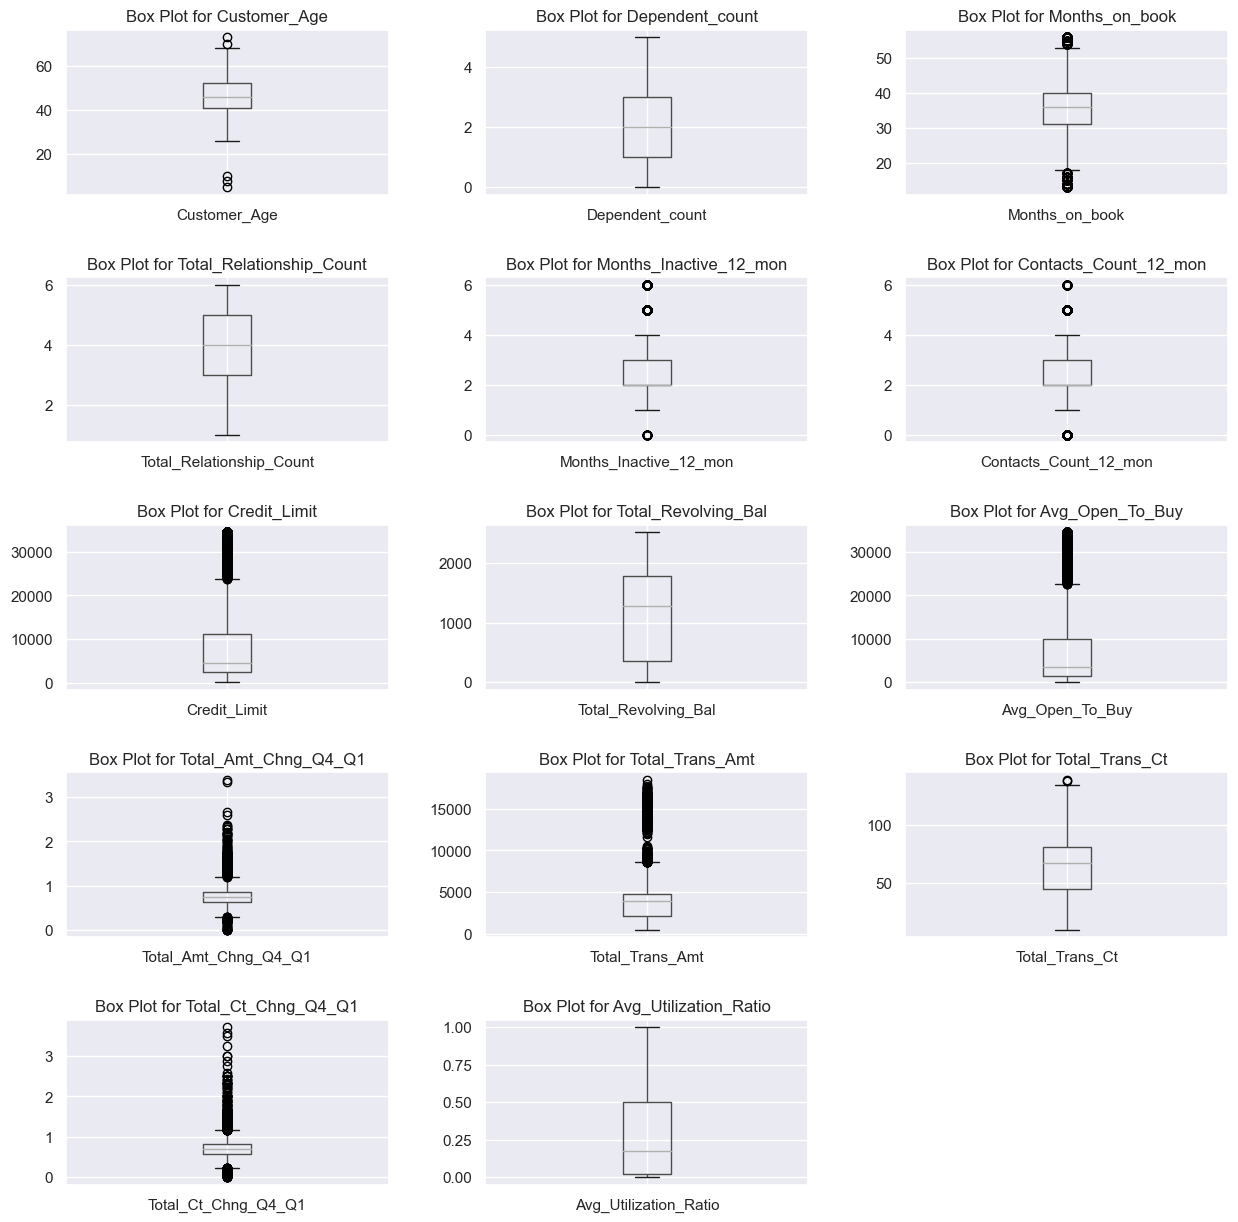

In [23]:
numeric_columns = df1.select_dtypes(include='number').columns
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
ax = ax.flatten()
for i in range(len(numeric_columns)):
    df1.boxplot(column=numeric_columns[i], ax=ax[i])
    ax[i].set_title(f'Box Plot for {numeric_columns[i]}')
for j in range(len(numeric_columns), len(ax)):
    ax[j].axis('off')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [24]:
def detect_outliers(df, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [25]:
outlier_percentage_table = pd.DataFrame()
percentage_list = []
for i in range (len(numeric_columns)):
    outl = detect_outliers(df1,numeric_columns[i])
    percentage = 100*outl.shape[0]/df1.shape[0]
    percentage_list.append(percentage)

outlier_percentage_table['numeric_column'] = numeric_columns
outlier_percentage_table['outlier_percentage'] = percentage_list
outlier_percentage_table

,numeric_column,outlier_percentage
0,Customer_Age,0.049324
1,Dependent_count,0.000000
2,Months_on_book,3.807833
3,Total_Relationship_Count,0.000000
4,Months_Inactive_12_mon,3.265266
5,Contacts_Count_12_mon,6.224721
6,Credit_Limit,9.687284
7,Total_Revolving_Bal,0.000000
8,Avg_Open_To_Buy,9.489987
9,Total_Amt_Chng_Q4_Q1,3.965670


In [26]:
df2 = df1.copy()
for i in range (outlier_percentage_table.shape[0]):
    if outlier_percentage_table.iloc[i,1]<10:
        outl_to_drop = detect_outliers(df1,numeric_columns[2])[numeric_columns[2]]
        df2 = df2[~df2.isin(outl_to_drop).any(axis=1)]
    else:
        print(i)
print(f'The percentage of rows dropped due to being outliers is {round(100*(1-df2.shape[0]/df1.shape[0]),2)} %.')

The percentage of rows dropped due to being outliers is 3.81 %.


Notice that, eventhough by the previous charts we presumed that there were too many data to be dropped, but the result shows that only 3.81% of data dropped due to being outliers. This is still below the tolerance standard (5%), thus we will keep going by df2.

In [27]:
df2 # df without outliers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,768805383,Existing Customer,30.0,F,3,High School,Married,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
2,768805383,Existing Customer,45.0,M,3,High School,Single,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
3,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
4,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10157,668805383,Existing Customer,5.0,F,3,High School,Married,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
10158,568805382,Existing Customer,10.0,M,3,High School,Single,60𝐾− 80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
10159,669911858,Existing Customer,40.0,F,4,Graduate,Unknown,Less than $40K,Blue,34,...,4,1,303.0,2517,796.0,1.405,1171,20,2.333,0.760
10160,509106358,Existing Customer,40.0,M,3,Uneducated,Married,60𝐾− 80K,Gold,21,...,1,0,116.0,0,4716.0,2.175,816,28,2.500,0.000


# 5. New column based on existing column

Based on existing column, I want to create a new column to provide insight the percentage change in total transaction amount (from Q1 to Q4)  relative to the total transaction amount itself. In order to do so, I need to count value of "Total_Amt_Chng_Q4_Q1" column divided by "Total_Trans_Amt" per customer multiply by 100 as an indicator of percentage. Then, I will save it into a new column named "Transaction_Percent_Change" column.

In [28]:
df3 = df2.copy()
df3['Transaction_Percent_Change'] = (df3['Total_Amt_Chng_Q4_Q1'] / df3['Total_Trans_Amt']) * 100
df3 # Cleaned df with a new column

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Transaction_Percent_Change
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.116696
1,768805383,Existing Customer,30.0,F,3,High School,Married,60𝐾− 80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.116696
2,768805383,Existing Customer,45.0,M,3,High School,Single,60𝐾− 80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.116696
3,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.119365
4,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.137467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10157,668805383,Existing Customer,5.0,F,3,High School,Married,60𝐾− 80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.116696
10158,568805382,Existing Customer,10.0,M,3,High School,Single,60𝐾− 80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.116696
10159,669911858,Existing Customer,40.0,F,4,Graduate,Unknown,Less than $40K,Blue,34,...,1,303.0,2517,796.0,1.405,1171,20,2.333,0.760,0.119983
10160,509106358,Existing Customer,40.0,M,3,Uneducated,Married,60𝐾− 80K,Gold,21,...,0,116.0,0,4716.0,2.175,816,28,2.500,0.000,0.266544


# 6. Charts and Insights

C:\Users\ACER\AppData\Local\Temp\ipykernel_3520\2804520162.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Months_on_book'])


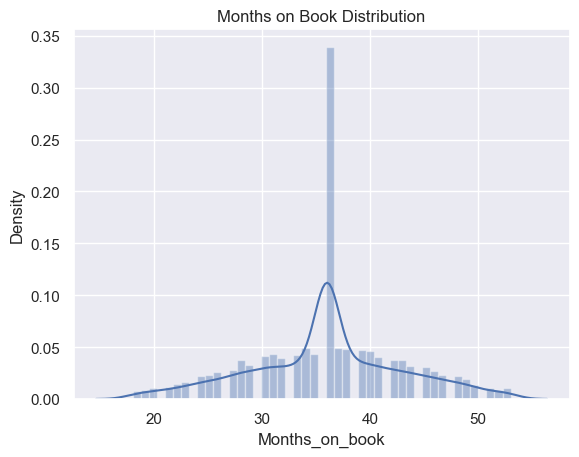

In [29]:
sns.distplot(df3['Months_on_book'])
plt.title("Months on Book Distribution")
plt.show()

In [30]:
df3['Months_on_book'].mode()

0    36
Name: Months_on_book, dtype: int64

From the chart above, it is evident that there is an anomaly in the "Months_on_book" variable, with the mode being at 36 and a significant deviation compared to the surrounding values.

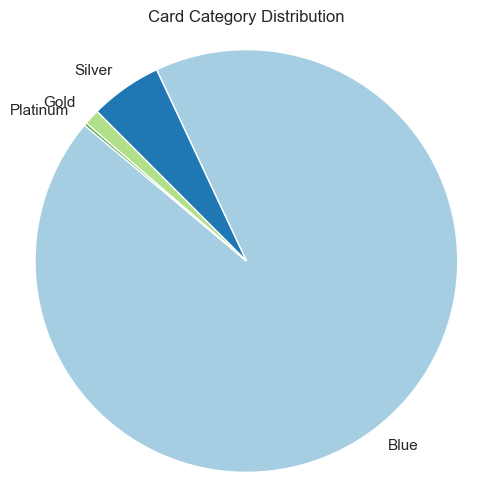

In [31]:
# Count the occurrences of each category
category_counts = df3['Card_Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, startangle=140, colors=plt.cm.Paired.colors)
plt.title("Card Category Distribution")
plt.axis('equal')
plt.show()

From the chart above, it can be concluded that there are more customers with Blue cards compared to other types.

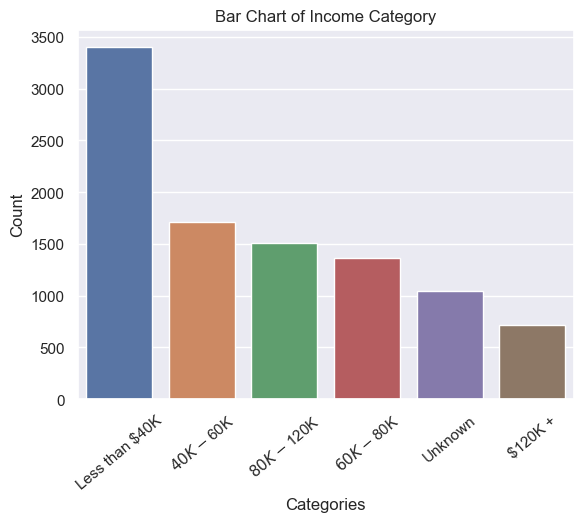

In [32]:
df3['Income_Category'] = df3['Income_Category'].replace('60𝐾− 80K', '$60K - $80K')
sns.countplot(x=df3['Income_Category'],order=df3['Income_Category'].value_counts().index)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart of Income Category')
plt.xticks(rotation=40)  # Rotate x-axis labels for better readability
plt.show()

From the above chart, it can be observed that the Income Category of the bank is predominantly dominated by incomes less than $40K, followed by $40K-$60K, $80K-$120K, and the least common is $120K.

# 7. Suggestion

1. Anomaly in 'Months_on_book': The extreme mode at 36 months in the 'Months_on_book' column might indicate a data collection or recording issue. It's important to investigate this anomaly further and verify the accuracy of the data. If it's confirmed to be an error, consider conducting data quality checks and cleaning to ensure accurate and reliable analysis.

2. The fact that the 'Card_category' column is overwhelmingly dominated by the 'Blue Card' category could suggest that the company's marketing efforts might be focusing heavily on this particular card type. It might be worth revisiting the marketing strategy to ensure that other card categories are also getting appropriate attention. Diversifying marketing efforts and providing incentives for other card categories could help in achieving a more balanced distribution and potentially tap into different customer segments.

3. Income Category Breakdown: The majority of customers fall under the 'Less than 40k' income category, followed by '40k-60k'. This information indicates that the company's customer base is skewed towards lower income segments. It could be beneficial to analyze customer profiles within these income brackets to identify potential opportunities for upselling or cross-selling. Additionally, exploring strategies to attract customers from higher income brackets could help in expanding the customer base and increasing revenue.